In [1]:
# In this notebook we will be creating functions of our own

In [2]:
# Converting Farenheit to Celsius

fahrenheit_val = 99
celsius_val = ((fahrenheit_val -32) * (5/9))
print(celsius_val)

37.22222222222222


In [5]:
fahrenheit_val2 = 43
celsius_val2 = ((fahrenheit_val2 -32) * (5/9))
print(celsius_val2)

6.111111111111112


In [8]:
# We could instead write this as a function
# Defining a function starts with the def command
# Next is the name and the round brackets with any arguments inside
# To show that we will start writing the function we use the :
## and continue with an indent
# Everything in the indent is part of the function
# To get the value back again we need the return command
def fahr_to_celsius(temp):
    converted = ((temp - 32) * (5/9))
    return converted

In [9]:
print(fahr_to_celsius(37))

2.7777777777777777


In [10]:
# The function can use the argument name, but in this case it is not needed
print(fahr_to_celsius(temp = 800))

426.6666666666667


In [11]:
# Adding context to our function
def fahr_to_celsius(temp):
    # Assigning a value to a variable
    converted = ((temp - 32) * (5/9))
    # returning the value in the variable
    return converted

In [13]:
# shorter version of our function

def fahr_to_celsius(temp):
    # We don't need to create a variable, we can return the value from the calculation directly
    return ((temp - 32) * (5/9))

print(fahr_to_celsius(15))
fahr_to_celsius(72) # In notebooks, if a value or variable is on the last line, you do not need to print to show it

-9.444444444444445


22.22222222222222

In [14]:
print("the freezing temperature of water is: ", fahr_to_celsius(32), "C")
print("the boiling temperature of water is: ", fahr_to_celsius(212), "C")

the freezing temperature of water is:  0.0 C
the boiling temperature of water is:  100.0 C


In [15]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

In [16]:
print("freezing point of water in kelvin: ", celsius_to_kelvin(0))

freezing point of water in kelvin:  273.15


In [17]:
# Can you write your own function to convert from Fahrenheit to Kelvin?
def fahr_to_kelvin(temp_f):
    return ((temp_f -32) * (5/9) +273.15)

print(fahr_to_kelvin(32))

273.15


In [18]:
# We can refer to other functions inside a new function

def fahr_in_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print(fahr_in_kelvin(32))

273.15


In [19]:
# Short hand of above

def fahr_in_kelvin(temp_f):
    return celsius_to_kelvin(fahr_to_celsius(temp_f))

print(fahr_in_kelvin(32))

273.15


In [25]:
# local and global variable example

def print_temperatures(temp_f, temp_k):
    msg_str = "have a nice day"
    print("temperature in fahrenheit was: ", temp_f)
    print("temperature in kelvin was: ", temp_k)
    print(msg_str)

temp_fahr = 212
temp_kelvin = fahr_to_kelvin(temp_fahr)
print_temperatures(temp_fahr, temp_kelvin) # Using global variable as arguments to the function

temperature in fahrenheit was:  212
temperature in kelvin was:  373.15
have a nice day


In [26]:
print(msg_str) # Won't work as it is a local variable defined only inside the print_temperature function
print(temp_f)

NameError: name 'msg_str' is not defined

In [27]:
def show_temperature():
    print("the temperature in kelvin is: ", temp_kelvin)

show_temperature() # this does work as it can access the globally defined variable temp_kelvin

the temperature in kelvin is:  373.15


In [28]:
# We need to import numpy and matplotlib.pyplot as they are not yet imported in this notebook
import numpy as np
import matplotlib.pyplot as plt

def visualise(filename):
    """
    This function loads data and creates 3 plots in a subplot:
    The mean, max, and min of the daily data (applied per row).
    """
    data = np.loadtxt(fname = filename, delimiter = ",")

    fig = plt.figure(figsize=(10, 3))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.amax(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.amin(data, axis=0))

    fig.tight_layout()
    plt.show()

def detect_problems(filename):
    """
    The data has a few common issues, this function checks for them and alerts the user
    If the max starts at 0 and reaches 20 (maximum possible value) by day 20 it prints
    to the console.
    If all the minima per day are zero then there is another print to console.
    """
    data = np.loadtxt(fname = filename, delimiter = ",")

    if np.amax(data, axis=0)[0] == 0 and np.amax(data, axis=0)[20] == 20:
        print("Suspicious looking maxima!")
    elif np.sum(np.amin(data, axis=0)) ==0:
        print("Minima add up to zero!")
    else:
        print("Seems ok!")

In [31]:
# We want to get all inflammation files and so we can use the glob package for this
import glob

filenames = sorted(glob.glob("inflammation*.csv"))
print(filenames)

['inflammation-01.csv', 'inflammation-02.csv', 'inflammation-03.csv', 'inflammation-04.csv', 'inflammation-05.csv', 'inflammation-06.csv', 'inflammation-07.csv', 'inflammation-08.csv']


inflammation-01.csv


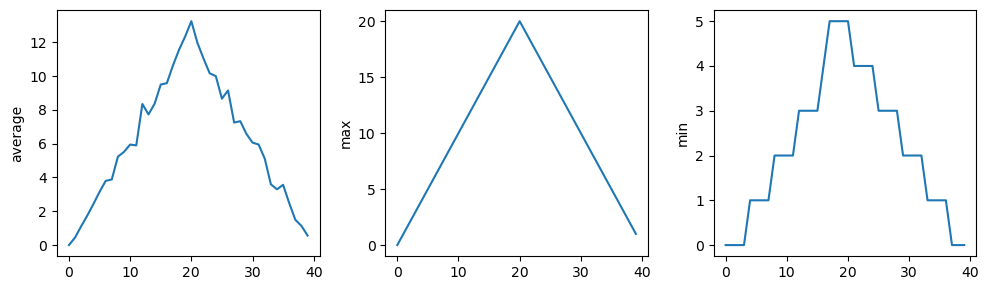

Suspicious looking maxima!
inflammation-02.csv


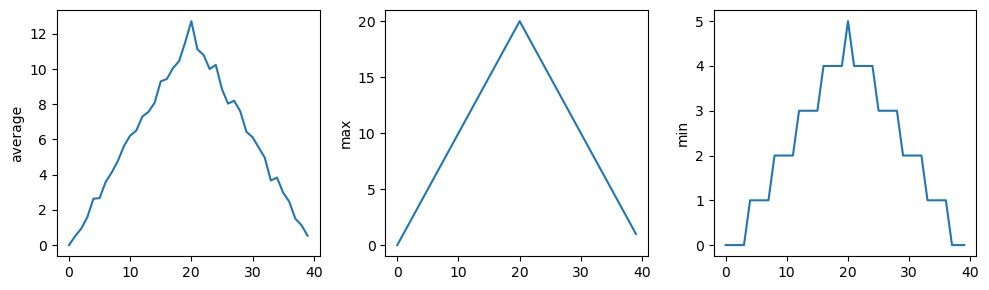

Suspicious looking maxima!
inflammation-03.csv


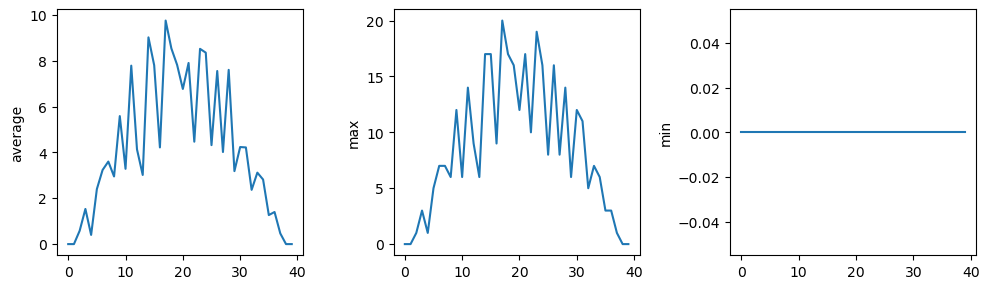

Minima add up to zero!


In [32]:
# We will take a subset of the found file names and process each of them with our new functions
for filename in filenames[:3]:
    print(filename)
    visualise(filename)
    detect_problems(filename)

In [33]:
# Let's write a new function
def offset_mean(data, target_mean_value):
    # We shift the mean of the dataset to our chosen value
    return (data - np.mean(data)) + target_mean_value

In [37]:
# We might not know what to expect if we appply it directly to our dataset
# To ensure it works as we want it's a good idea to use a test dataset
z = np.zeros((2,2))
print("original is: ", z)
print("offset is: ", offset_mean(z, 3))

original is:  [[0. 0.]
 [0. 0.]]
offset is:  [[3. 3.]
 [3. 3.]]


In [35]:
# What does the np.zeros function do?
np.zeros?

Docstring:
zeros(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or tuple of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of zeros with the given shape, dtype, and order.

See Al

In [39]:
# We can see in the documentation above that some values have defaults
# Let's add a default value to our new function
def offset_mean(data, target_mean_value = 3):
    return (data - np.mean(data)) + target_mean_value

# Testing the default value for our argument
print("Default value: ", offset_mean(z))
print("Chosen value of 5: ", offset_mean(z, 5))

Default value:  [[3. 3.]
 [3. 3.]]
Chosen value of 5:  [[5. 5.]
 [5. 5.]]


In [40]:
# The np.zeros documentation has a lot more information than just the arguments and defaults
# We can add more information, even examples by using Docstrings
# Docstrings are included with: """your description goes here"""
# When using help() function or ? after a function name we get useful info

def offset_mean(data, target_mean_value = 3):
    """
    This function will change the mean of your data to the chosen value. The default is 3.

    ------ Example -----
    data = np.zeros((2,2))
    offset_mean(data, 7)
    -> ((7, 7),
        (7, 7))
    """
    return (data - np.mean(data)) + target_mean_value

In [41]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value=3)
    This function will change the mean of your data to the chosen value. The default is 3.

    ------ Example -----
    data = np.zeros((2,2))
    offset_mean(data, 7)
    -> ((7, 7),
        (7, 7))



In [42]:
# Now if we use help(offset_mean) or offset_mean? we can see our documentation
offset_mean?

Signature: offset_mean(data, target_mean_value=3)
Docstring:
This function will change the mean of your data to the chosen value. The default is 3.

------ Example -----
data = np.zeros((2,2))
offset_mean(data, 7)
-> ((7, 7),
    (7, 7))
File:      c:\users\tis254\appdata\local\temp\ipykernel_19536\1465574958.py
Type:      function